# Covariance Matrix
Before going further, we introduce the Covariance Matrix, that is a fundamental tool both in machine learning and data science.

## Expected Value and Variance
Let us first recap the concepts of Expected value (or mean) and Variance.
The expected value of a probability distribution is the weighted average of the outcomes weighted by their probability:
$$
E[X] = \sum_x x Pr(X=x)
$$
If we want to estimate the expected value of the distribution from sampled data (a dataset D) we can compute the average:
$$
E[D] = \frac{1}{N}\sum_{x\in D} x \quad\quad \text{with}\quad N = |D|
$$
This equation holds also for multivariate distributions, where a multivariate distribution is a joint distribution of multiple random variables (or random vector). In this case the mean is a vector where each component is the mean of a random variable.
An important property of the mean is that it is __linear__:
$$
E[a X + b Y] = aE[X] + bE[Y]
$$
where X and Y are random variables and a,b are constants.
While the expected value tells what is the "average outcome" of the random variable the variace tells, in average, how much the outcomes differs from the expected value:
$$
Var[X] = E[(X-E[X])^2]
$$

## Covariance Matrix
We already introduced the covariance as the linear association or relationship between two random variables:
$$
Cov(X,Y) = Cov(Y,X) = E[(X-E[X])(Y-E[Y])]
$$
Now we will see a more useful interpretation.
Assume we have some data samples in a feature space $R^D$ sampled from the same distribution, we can model each feature as a random variable and the data distribution as a multivariate distribution. Since we have multiple directions in the feature space, we could ask what is the variance of the random variable obtained projecting the random vector onto a given direction?

If I take a unit norm vector __v__ to denote the direction, then the projection of the random vector __x__ onto the direction __v__ is:
$$
\text{proj}_{\mathbf{v}} \mathbf{x} = \mathbf{v} \cdot \mathbf{x} = \mathbf{v}^T \mathbf{x}
$$ 
Hence the projection is a new random $z = \mathbf{v}^T \mathbf{x}$ which is the linear combination of the components of the random vector __x__.
If we compute the variance of the new random variable z we obtain
$$
\begin{align}
Var(z) =& Var(\mathbf{v}^T \mathbf{x}) = \\
& E[(\mathbf{v}^T \mathbf{x}- E[\mathbf{v}^T \mathbf{x}])^2] = \\
& E[(\mathbf{v}^T(\mathbf{x}-E[\mathbf{x}]))^2] = \\
& E[(\mathbf{v}^T(\mathbf{x}- E[\mathbf{x}]))(\mathbf{v}^T(\mathbf{x}- E[\mathbf{x}]))] = \\
& E[(\mathbf{v}^T(\mathbf{x}- E[\mathbf{x}]))(\mathbf{v}^T(\mathbf{x}- E[\mathbf{x}]))^T] = \\
& E[\mathbf{v}^T(\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^T\mathbf{v}] = \\
& \mathbf{v}^T E[(\mathbf{x}-E[\mathbf{x}])(\mathbf{x}-E[\mathbf{x}])^T]\mathbf{v}

\end{align}
$$
Now if we expand the matrix product inside the expectation we obtain:
$$
Var(\mathbf{v}^T \mathbf{x}) = 
\mathbf{v}^T
\begin{pmatrix}
Cov(x_1,x_1) & . . . & Cov(x_1,x_d) \\
... & ... & ...\\
Cov(x_d,x_1) & ... & Cov(x_d,x_d)
\end{pmatrix}
\mathbf{v}
 = \mathbf{v}^T \Sigma \mathbf{v}
$$

Where the matrix $\Sigma$ is called covariance matrix.
Let us see some examples.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# let us draw some samples from a 2D distribution 
# with covariance matrix cov
N = 10000
mu = [0.,0.]
cov = np.asarray([[.4, .2],
        [.2, .01]])
cov = cov @ np.transpose(cov)
cov

array([[0.2   , 0.082 ],
       [0.082 , 0.0401]])

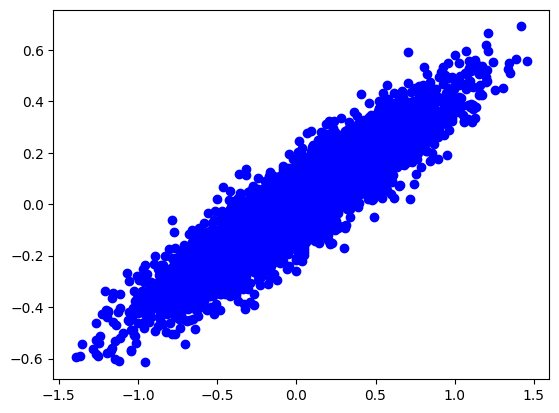

In [3]:
X = np.random.multivariate_normal(mean=mu,cov=cov,size=N//2)
fig,ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1],c="b")
plt.show()

In [4]:
# now we compute the variance in the direction
# given by the angle theta
import ipywidgets as widgets
@widgets.interact(theta=(0,360))
def show_variance(theta=45):
    theta = 2*np.pi*(theta/360)
    v = np.asarray([np.cos(theta),np.sin(theta)])
    variance = np.transpose(v) @ cov @ v
    fig,ax = plt.subplots()
    fig.suptitle(f"variance = {variance:2f}")
    ax.scatter(x=X[:,0],y=X[:,1],c="b")
    # plot the direction scaled by the
    # variance
    ax.arrow(
        x=0,y=0,
        dx=v[0] * variance,
        dy=v[1] * variance,
        color="r",width=.01)
    plt.show()
    
    

interactive(children=(IntSlider(value=45, description='theta', max=360), Output()), _dom_classes=('widget-inte…